In [1]:
import pandas as pd
import os

directory = "../data/binarised/"
datasets = {}

for foldername in os.listdir(directory):
    
    if foldername.endswith('.ipynb_checkpoints'):  # Skip Jupyter notebook files
        continue
        
    print(foldername)     
    
    file_path = os.path.join(directory, foldername, foldername + '_binarised.csv.gz')
    #print(file_path)
    
    if os.path.exists(file_path):  # Check if file exists before reading
        datasets[foldername] = pd.read_csv(file_path, compression='gzip')
    else:
        print(f"No matching file found for folder: {foldername}")


cardiotox_with_sider_inactives
sider
cardiotox_with_sider_actives
cardiotox_with_sider_all
sider_cardiacdisorders
DICTrank


In [2]:
inchi_sets = {}
smiles_sets = {}

for name, df in datasets.items():
    inchi_sets[name] = set(df['Standardized_InChI'].unique())
    smiles_sets[name] = set(df['Standardized_SMILES'].unique())

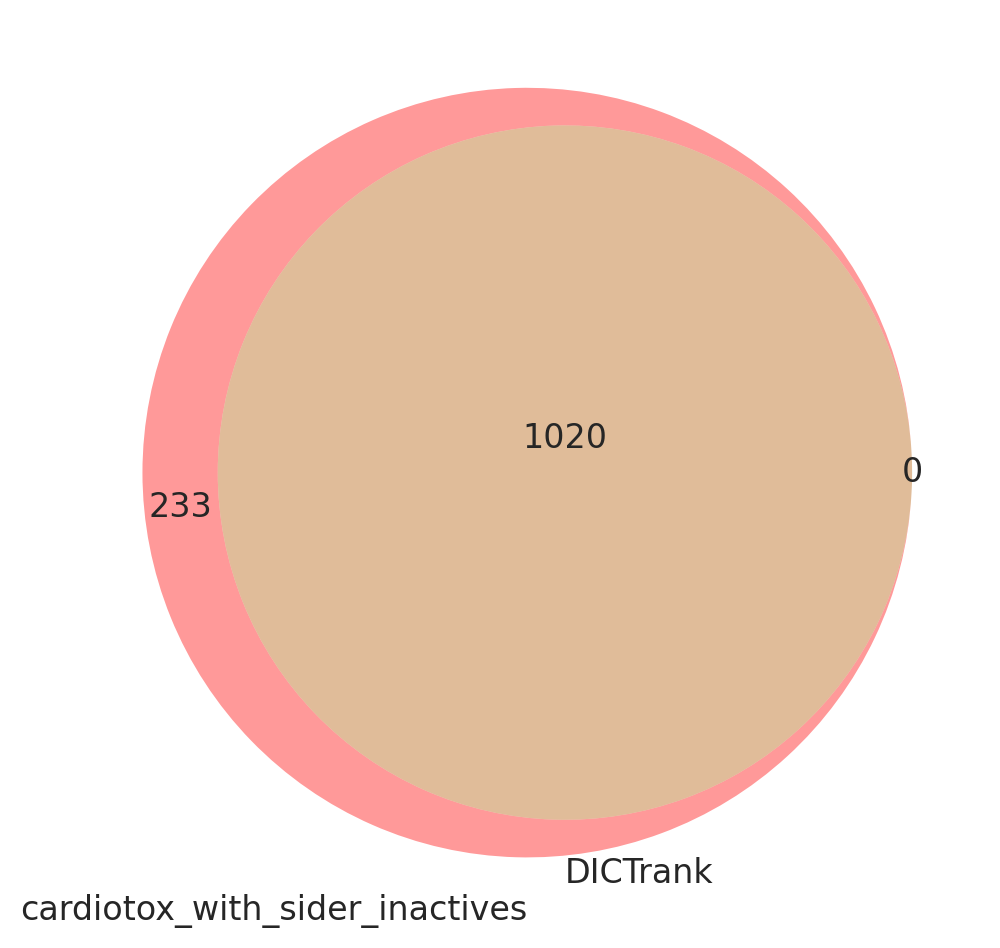

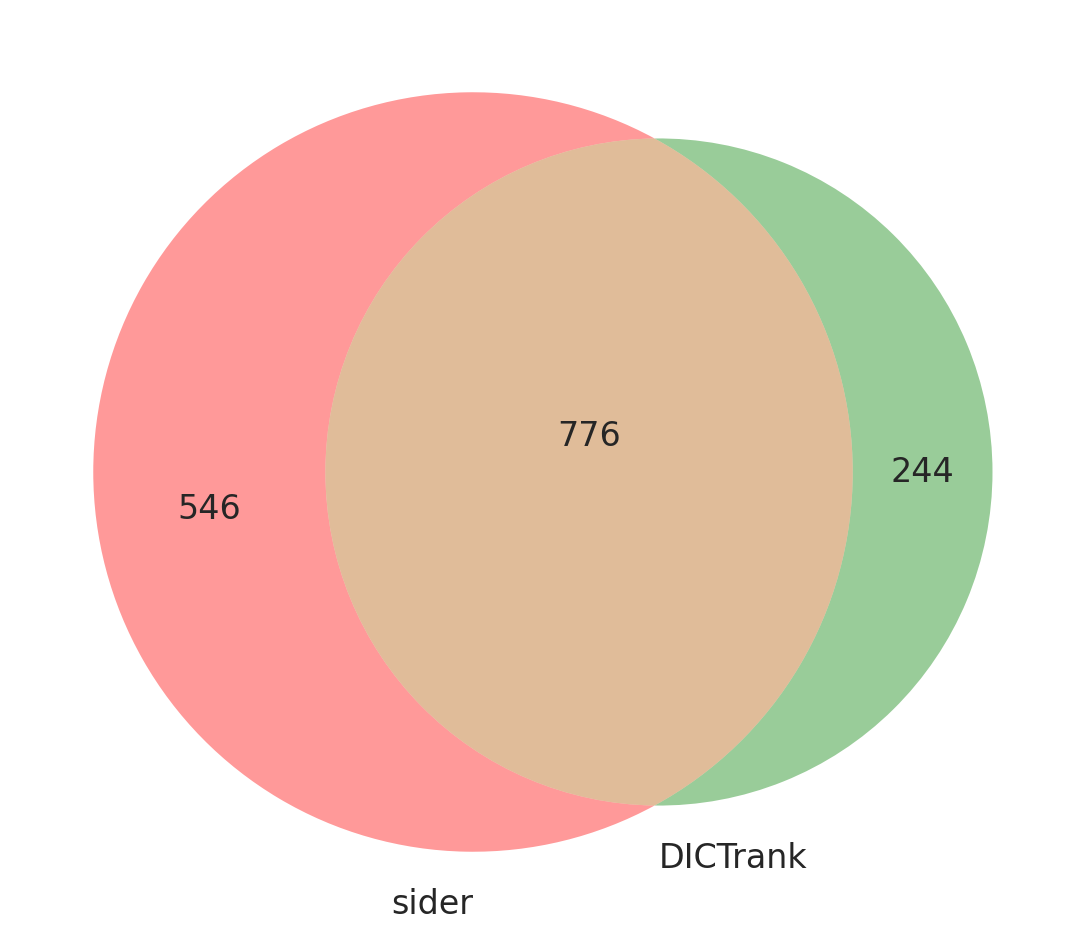

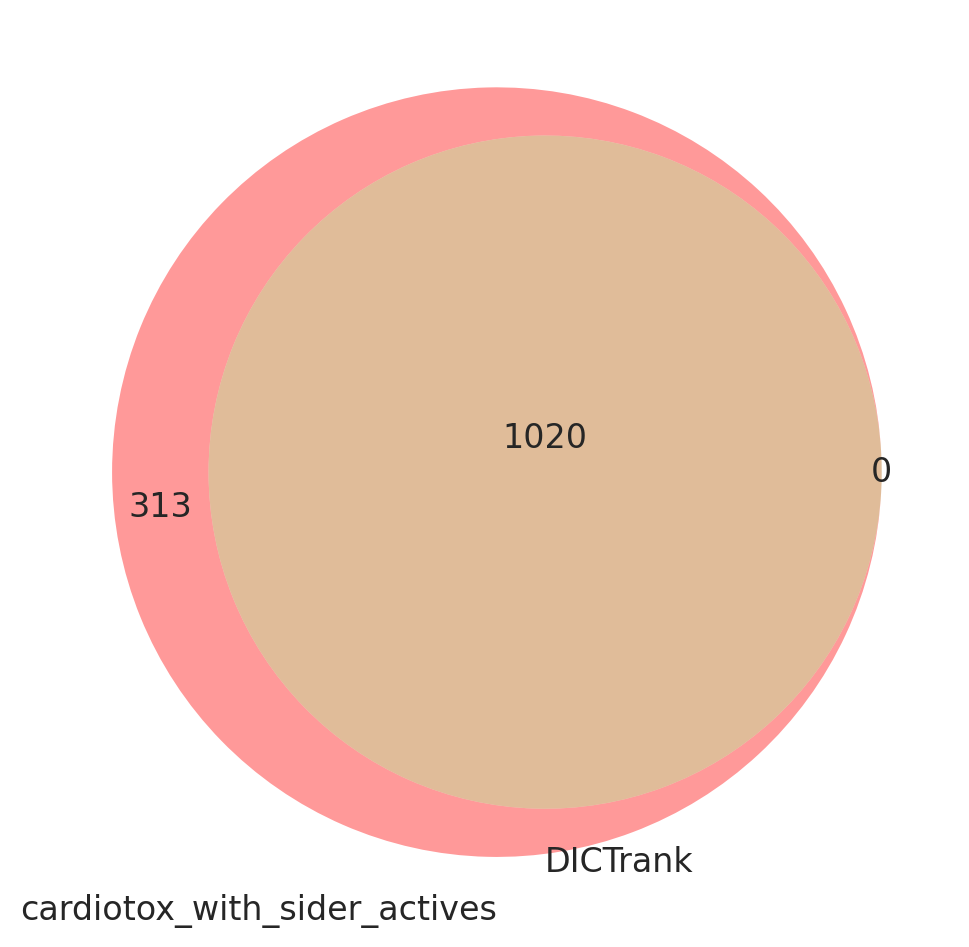

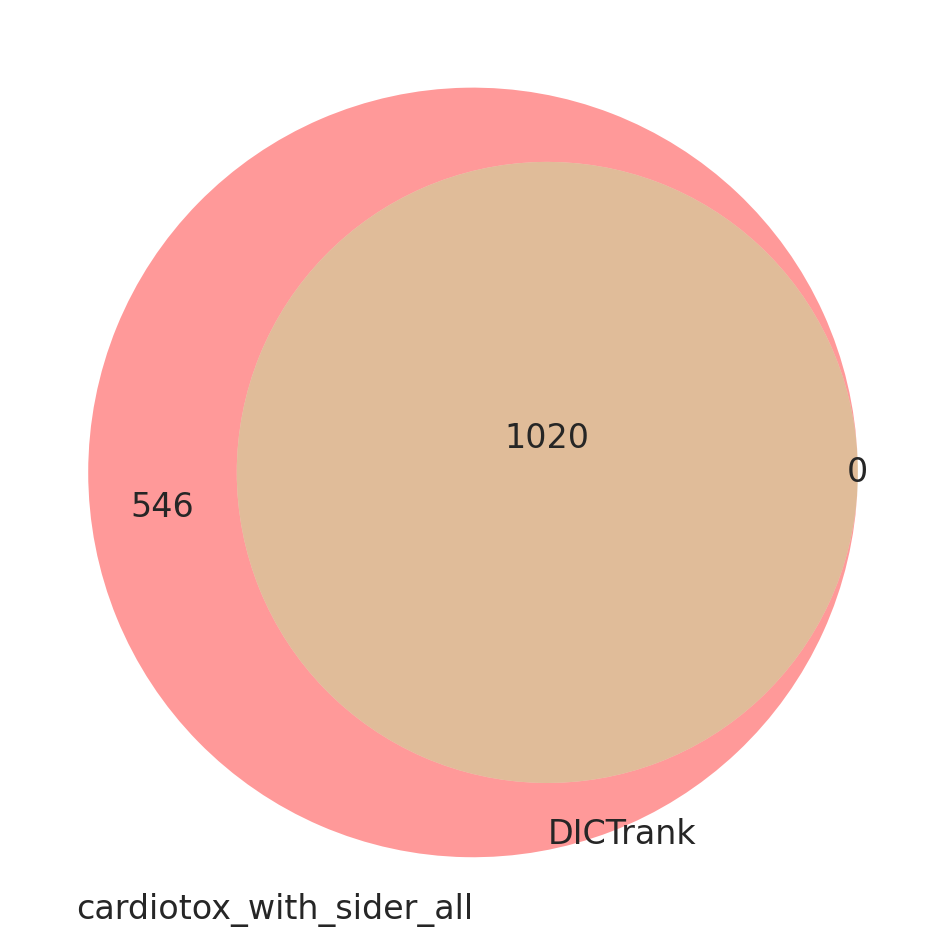

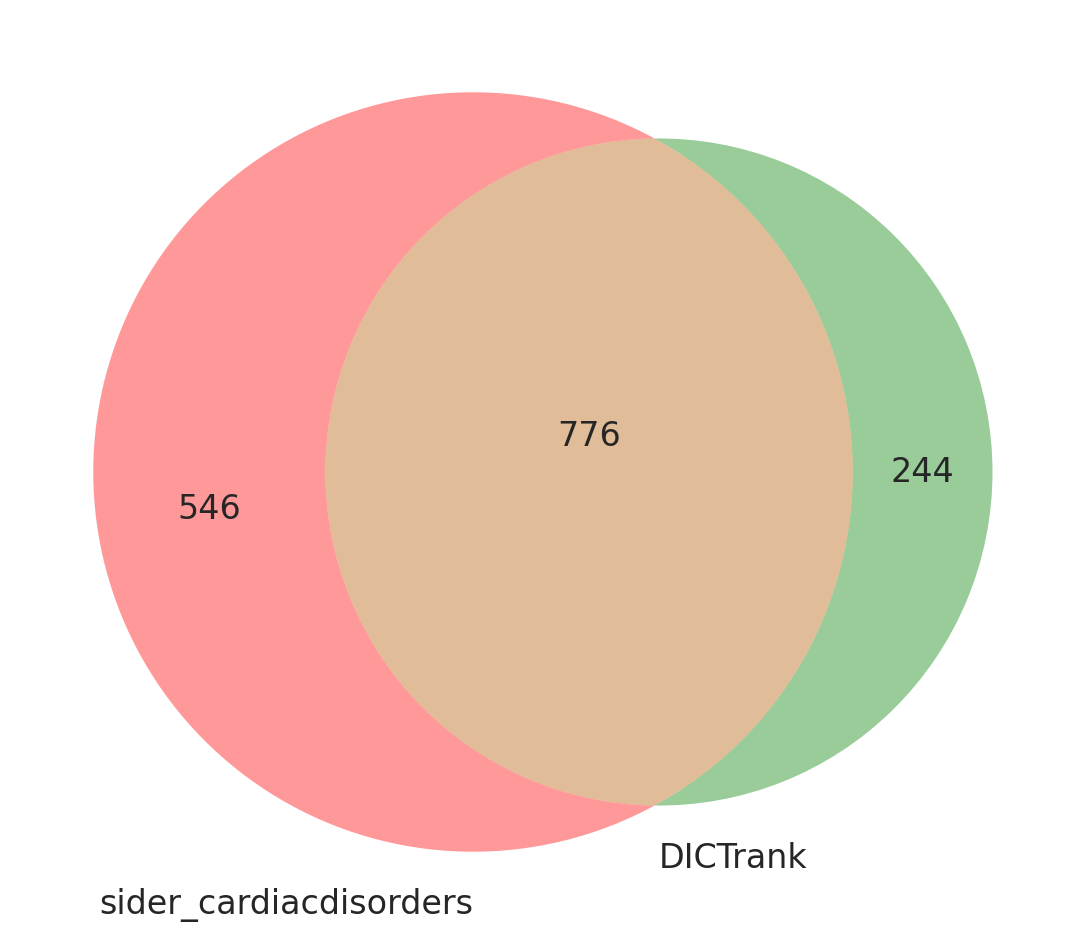

In [3]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import seaborn as sns


# Check if JUMPCP is in your datasets
if 'DICTrank' not in datasets:
    raise ValueError("DICTrank not found in datasets")

# Iterate through each dataset and compare with JUMCP
for name, data in datasets.items():
    if name != "DICTrank":  # Avoid self-comparison
        # Compare based on InChI

        # Use Seaborn's style
        sns.set_style("whitegrid")
        sns.set_palette("pastel")

        # Define figure size and DPI
        fig = plt.figure(figsize=(10, 6), dpi=200)  # Width=10 inches, Height=6 inches, DPI=100

        venn = venn2([smiles_sets[name], smiles_sets['DICTrank']], set_labels=[name, 'DICTrank'])
        
        
        venn.get_label_by_id('10').set_fontsize(12)  # Set1 only
        label = venn.get_label_by_id('10')
        x, y = label.get_position()
        label.set_position((x, y-0.05))  # adjust y value as needed
        
        venn.get_label_by_id('11').set_fontsize(12)  # Intersection
        label = venn.get_label_by_id('11')
        x, y = label.get_position()
        label.set_position((x, y+0.05))  # adjust y value as needed

        venn.get_label_by_id('01').set_fontsize(12)  # Set2 only

        plt.show()

In [29]:
datasets["sider_cardiacdisorders"]

,Standardized_SMILES,Standardized_InChI,Cardiac disorders
0,[NH3+]CC[NH2+]CC[NH2+]CC[NH2+]CC[NH3+],InChI=1S/C8H23N5/c9-1-3-11-5-7-13-8-6-12-4-2-1...,1
1,O=C([O-])C[NH+](CC[NH+](CC(=O)[O-])CC(=O)[O-])...,InChI=1S/C22H31N3O11/c26-18(27)10-23(6-7-24(11...,1
2,CCNC(=O)C1CCC[NH+]1C(=O)C(CCCNC(N)=[NH2+])NC(=...,InChI=1S/C66H86N18O12/c1-4-70-64(95)55-17-11-2...,1
3,CC[NH+](CC)C(=O)Nc1ccc(OCC(O)C[NH2+]C(C)(C)C)c...,InChI=1S/C20H33N3O4/c1-7-23(8-2)19(26)22-15-9-...,1
4,COC12CCC3(CC1C(C)(O)C(C)(C)C)C1Cc4ccc([O-])c5c...,"InChI=1S/C29H41NO4/c1-25(2,3)26(4,32)20-15-27-...",1
...,...,...,...
1317,CC12CCC3c4ccc([O-])cc4CC(CCCCCCCCC[S+](O)CCCC(...,InChI=1S/C32H47F5O3S/c1-30-17-15-26-25-12-11-2...,0
1318,Cc1c(C2(c3cc(Br)c([O-])c(Br)c3C)OS(=O)(=O)c3cc...,InChI=1S/C21H14Br4O5S/c1-9-12(7-14(22)19(26)17...,0
1319,CC(O)C1C(=O)[NH+]2C(C(=O)[O-])=C(SC3C[NH2+]C(C...,InChI=1S/C15H24N4O6S2/c1-6-11-10(7(2)20)14(21)...,0
1320,CC1(C)OC2CC3C4CC=C5CC(=O)CCC5(C)C4(F)C(O)CC3(C...,InChI=1S/C24H32ClFO5/c1-20(2)30-19-10-16-15-6-...,0


In [30]:
datasets["DICTrank"]

,Trade Name,Generic/Proper Name(s),Active Ingredient(s),DICT _ Concern,Standardized_SMILES,Standardized_InChI,DICTrank
0,anzemet,dolasetron mesylate,dolasetron mesylate,most,O=C(OC1CC2CC3CC(C1)[NH+]2CC3=O)c1c[nH]c2ccccc12,InChI=1S/C19H20N2O3/c22-18-10-21-12-5-11(18)6-...,1
1,trazodone hydrochloride,trazodone hydrochloride,trazodone hydrochloride,most,O=c1n(CCC[NH+]2CCN(c3cccc(Cl)c3)CC2)nc2ccccn12,InChI=1S/C19H22ClN5O/c20-16-5-3-6-17(15-16)23-...,1
2,nuplazid,pimavanserin tartrate,pimavanserin tartrate,most,CC(C)COc1ccc(CNC(=O)[NH+](Cc2ccc(F)cc2)C2CC[NH...,InChI=1S/C25H34FN3O2/c1-19(2)18-31-24-10-6-20(...,1
3,metformin hydrochloride,metformin hydrochloride,metformin hydrochloride,most,C[NH+](C)C([NH3+])=NC(N)=[NH2+],"InChI=1S/C4H11N5/c1-9(2)4(7)8-3(5)6/h1-2H3,(H5...",1
4,flurbiprofen,flurbiprofen,flurbiprofen,most,CC(C(=O)[O-])c1ccc(-c2ccccc2)c(F)c1,InChI=1S/C15H13FO2/c1-10(15(17)18)12-7-8-13(14...,1
...,...,...,...,...,...,...,...
1015,propylthiouracil,propylthiouracil,propylthiouracil,no,CCCc1cc(=O)[n-]c(=S)[n-]1,InChI=1S/C7H10N2OS/c1-2-3-5-4-6(10)9-7(11)8-5/...,0
1016,trecator,ethionamide,ethionamide,no,CCc1cc(C([NH3+])=S)ccn1,InChI=1S/C8H10N2S/c1-2-7-5-6(8(9)11)3-4-10-7/h...,0
1017,ethosuximide,ethosuximide,ethosuximide,no,CCC1(C)CC(=O)NC1=O,InChI=1S/C7H11NO2/c1-3-7(2)4-5(9)8-6(7)10/h3-4...,0
1018,disulfiram,disulfiram,disulfiram,no,CC[NH+](CC)C(=S)SSC(=S)[NH+](CC)CC,InChI=1S/C10H20N2S4/c1-5-11(6-2)9(13)15-16-10(...,0
